<a href="https://colab.research.google.com/github/alifabdullah/.vscode/blob/main/Logistic_Regression_with_hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp

In [181]:
df = pd.read_csv('iris_data.csv')

In [182]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [183]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [184]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [185]:
df1 = df[df['Species']!="Iris-setosa"]

In [186]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [187]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [188]:
from sklearn.preprocessing import LabelEncoder
La = LabelEncoder()
La.fit(df1['Species'])
df1['Species'] = La.transform(df1['Species'])


/tmp/ipython-input-188-1315734594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Species'] = La.transform(df1['Species'])


In [189]:

X = df1.drop('Species',axis=1)
y = df1['Species']

In [190]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
50,51,7.0,3.2,4.7,1.4
51,52,6.4,3.2,4.5,1.5
52,53,6.9,3.1,4.9,1.5
53,54,5.5,2.3,4.0,1.3
54,55,6.5,2.8,4.6,1.5
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [191]:
y

,Species
50,0
51,0
52,0
53,0
54,0
...,...
145,1
146,1
147,1
148,1


In [192]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [193]:
y_train

,Species
105,1
138,1
76,0
92,0
119,1
...,...
110,1
121,1
64,0
142,1


In [194]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


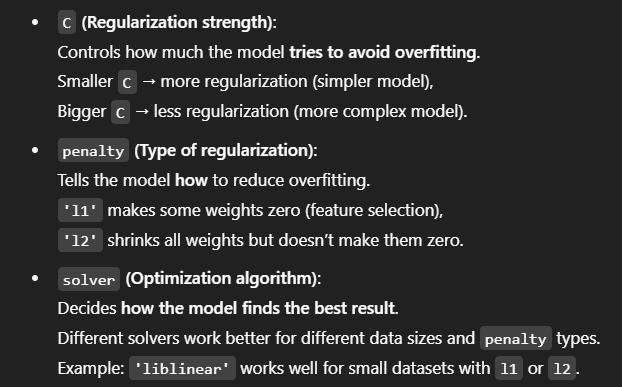

In [195]:
from inspect import Parameter
from sklearn.model_selection import GridSearchCV
Parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [196]:
model.fit(X_train,y_train)

LogisticRegression()

In [197]:
accuracy = model.score(X_test,y_test)
accuracy

1.0

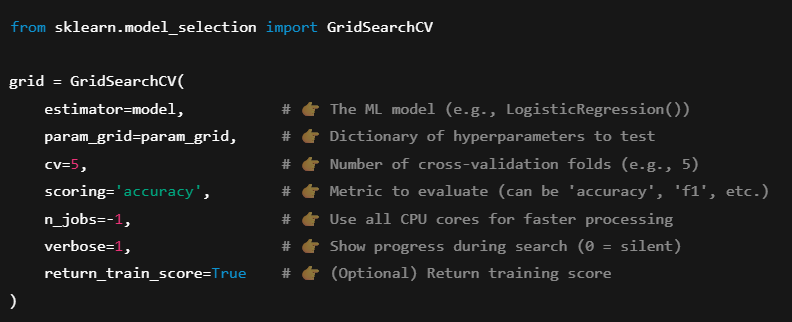

In [198]:
grid_search = GridSearchCV(model,param_grid=Parameter,scoring='f1',cv=5)
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1')

In [199]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}
1.0


In [200]:
print(grid_search.best_score_)


1.0


In [201]:
y_pred = grid_search.predict(X_test)

In [202]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [203]:
from sklearn.metrics import accuracy_score

In [204]:
accuracy_score(y_pred,y_test)

1.0

In [205]:
score=accuracy_score(y_pred,y_test)
print(score)

1.0


In [206]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print("train",train_accuracy)
print("test",test_accuracy)

train 1.0
test 1.0


In [207]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



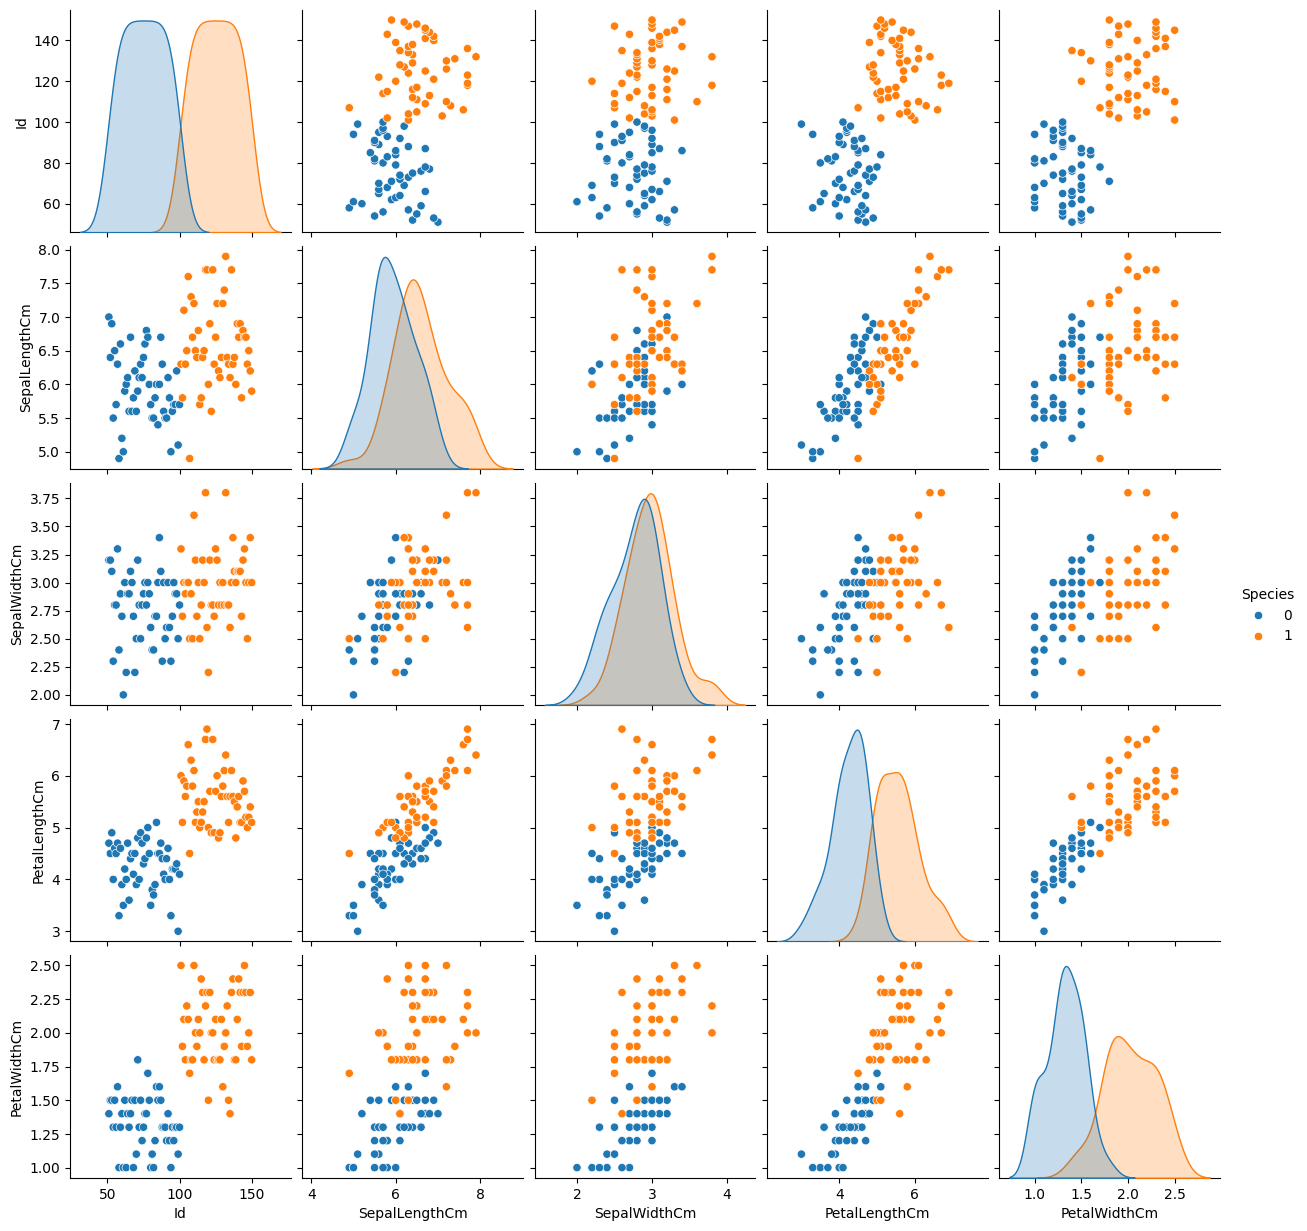

In [208]:
sns.pairplot(df1,hue='Species')

In [209]:
df1.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.373000,0.279165,0.620325,0.703528,0.866069
SepalLengthCm,0.373000,1.000000,0.553855,0.828479,0.593709,0.494305
SepalWidthCm,0.279165,0.553855,1.000000,0.519802,0.566203,0.308080
PetalLengthCm,0.620325,0.828479,0.519802,1.000000,0.823348,0.786424
PetalWidthCm,0.703528,0.593709,0.566203,0.823348,1.000000,0.828129
Species,0.866069,0.494305,0.308080,0.786424,0.828129,1.000000
